In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# LOADING THE DATA

In [3]:
df = pd.read_csv('loan_dataset.csv')
df

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [4]:
df.head()

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no


# CHECKING THE MISSING VALUES 

In [5]:
df.isnull().sum()

Unnamed: 0       0
ID               0
Pin-code         0
age              0
Fam members      0
Education        0
T.Experience     0
Income           0
Mortgage         0
Fixed Deposit    0
Demat            0
Net Banking      0
Loan             0
dtype: int64

# CHECKING DUPLICATE VALUES 

In [6]:
print(df.duplicated().sum())

0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   ID             5000 non-null   int64  
 2   Pin-code       5000 non-null   int64  
 3   age            5000 non-null   int64  
 4   Fam members    5000 non-null   float64
 5   Education      5000 non-null   object 
 6   T.Experience   5000 non-null   float64
 7   Income         5000 non-null   int64  
 8   Mortgage       5000 non-null   int64  
 9   Fixed Deposit  5000 non-null   object 
 10  Demat          5000 non-null   object 
 11  Net Banking    5000 non-null   object 
 12  Loan           5000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 507.9+ KB


# CHECKING NEGATIVE VALUES

In [8]:
print(df['T.Experience'].value_counts())

T.Experience
 32.0    154
 20.0    148
 9.0     147
 5.0     146
 23.0    144
 35.0    143
 25.0    142
 28.0    138
 18.0    137
 19.0    135
 26.0    134
 24.0    131
 3.0     129
 16.0    127
 14.0    127
 30.0    126
 17.0    125
 34.0    125
 27.0    125
 29.0    124
 22.0    124
 7.0     121
 8.0     119
 6.0     119
 15.0    119
 10.0    118
 13.0    117
 33.0    117
 11.0    116
 37.0    116
 36.0    114
 4.0     113
 21.0    113
 31.0    104
 12.0    102
 38.0     88
 2.0      85
 39.0     85
 1.0      74
 0.0      66
 40.0     57
 41.0     43
-1.0      33
-2.0      15
 42.0      8
-3.0       4
 43.0      3
Name: count, dtype: int64


In [9]:
df['Fam members'].value_counts()

Fam members
1.0    1472
2.0    1296
4.0    1222
3.0    1010
Name: count, dtype: int64

# FILLING THE NEGATIVE VALUES WITH 0

In [10]:
median_exp = df[df['T.Experience'] >= 0]['T.Experience'].median()
df['T.Experience'] = df.apply(
    lambda row: min(row['age'], row['T.Experience']) if row['T.Experience'] >= 0 else 0,
    axis=1
)

In [11]:
print(df['Loan'].value_counts())

Loan
no     4520
yes     480
Name: count, dtype: int64


In [12]:
df.shape

(5000, 13)

In [13]:
negative_experience = df[df['T.Experience'] < 0]
print(f"Number of negative values: {len(negative_experience)}")
display(negative_experience)

Number of negative values: 0


,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan


# CHECKING THE OUTLIERS

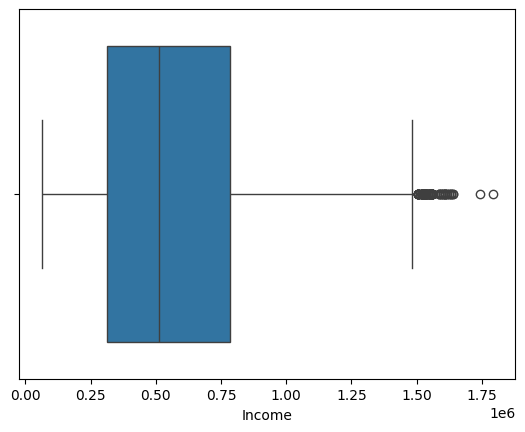

In [14]:
sns.boxplot(x=df['Income'])
plt.show()

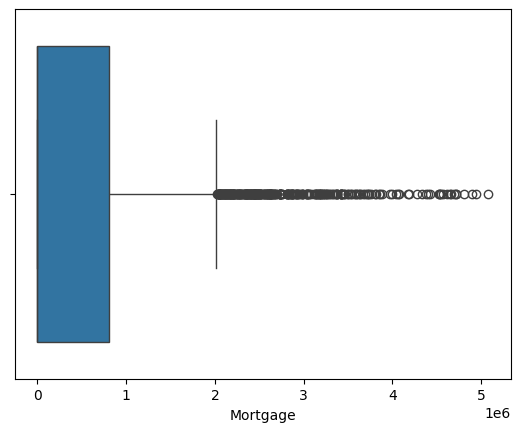

In [15]:
sns.boxplot(x=df['Mortgage'])
plt.show()

# REMOVING THE OUTLIERS 

In [16]:

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & 
         (df['Income'] <= upper_bound)]

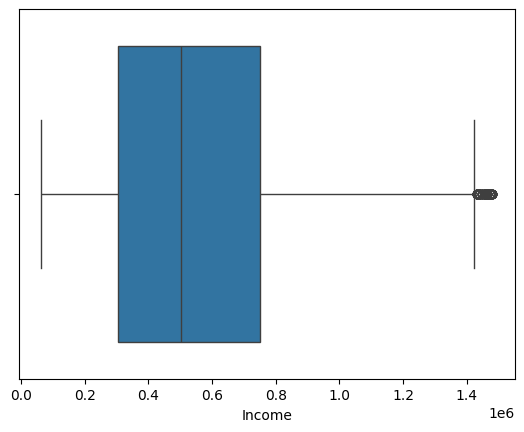

In [17]:
sns.boxplot(x=df['Income'])
plt.show()

In [18]:
Q1 = df['Mortgage'].quantile(0.25)
Q3 = df['Mortgage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Mortgage'] >= lower_bound) & 
         (df['Mortgage'] <= upper_bound)]

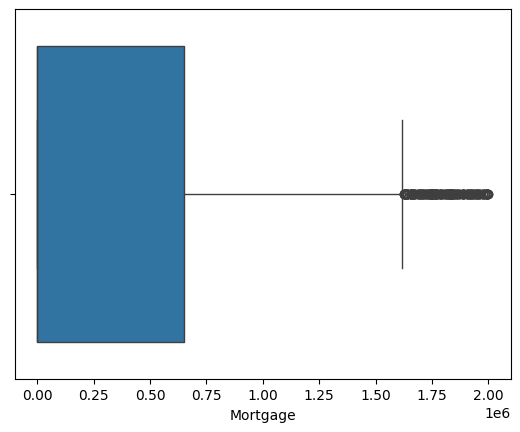

In [19]:
sns.boxplot(x=df['Mortgage'])
plt.show()

# CLEANED DATA

In [20]:
df.to_csv("cleaned_loan_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_loan_dataset.csv'")

Cleaned dataset saved as 'cleaned_loan_dataset.csv'


In [21]:
df.shape

(4627, 13)

In [22]:
df = pd.read_csv('cleaned_loan_dataset.csv')
df

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4623,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4624,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4625,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [23]:
df.drop(['Unnamed: 0'], axis=1)

,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4622,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4623,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4624,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4625,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [24]:
df.to_csv("dashboard_dataset.csv", index=False)
print("Cleaned dataset saved as 'dashboard_dataset.csv'")

Cleaned dataset saved as 'dashboard_dataset.csv'


In [25]:
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())

Education ['Under Graduate' 'Graduate' 'Post Graduate']
Fixed Deposit ['no' 'yes']
Demat ['yes' 'no']
Net Banking ['no' 'yes']
Loan ['no' 'yes']


In [26]:
df1 =pd.read_csv('dashboard_dataset.csv')
df1


,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4623,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4624,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4625,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [58]:
df2=df1.drop(['Unnamed: 0','ID','Pin-code','Fam members'], axis=1)
df2

,age,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,23,Under Graduate,1.0,392000,0,no,yes,no,no
1,43,Under Graduate,19.0,272000,0,no,yes,no,no
2,37,Under Graduate,15.0,88000,0,no,no,no,no
3,33,Graduate,9.0,800000,0,no,no,no,no
4,33,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...
4622,27,Post Graduate,3.0,320000,0,no,no,yes,no
4623,28,Under Graduate,4.0,120000,680000,no,no,yes,no
4624,61,Post Graduate,39.0,192000,0,no,no,no,no
4625,63,Graduate,40.0,392000,0,no,no,yes,no


In [28]:
df1.to_csv("dashboard_dataset.csv", index=False)
print("Cleaned dataset saved as 'dashboard_dataset.csv'")

Cleaned dataset saved as 'dashboard_dataset.csv'


# VISUALIZATIONS

# Distribution Plots


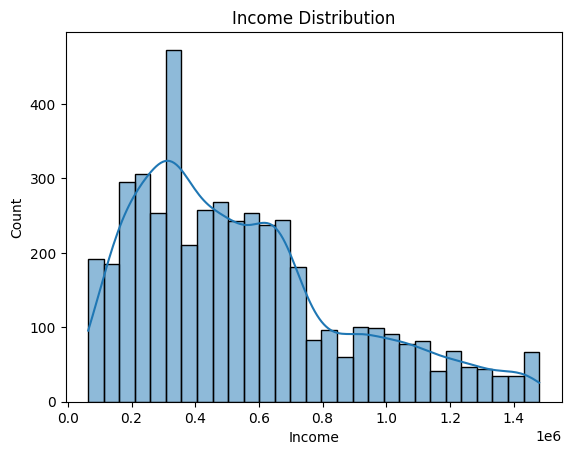

In [29]:
sns.histplot(df1['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

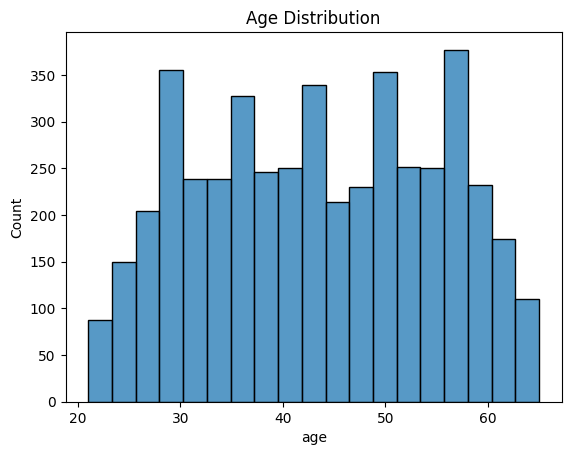

In [30]:
sns.histplot(df1['age'])
plt.title('Age Distribution')
plt.show()

# Categorical Counts

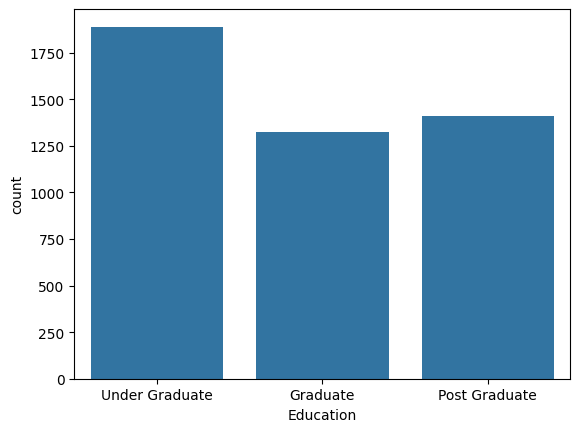

In [31]:
sns.countplot(x='Education', data=df1)
plt.show()

Text(0.5, 1.0, 'count of loans accepted and not accepted')

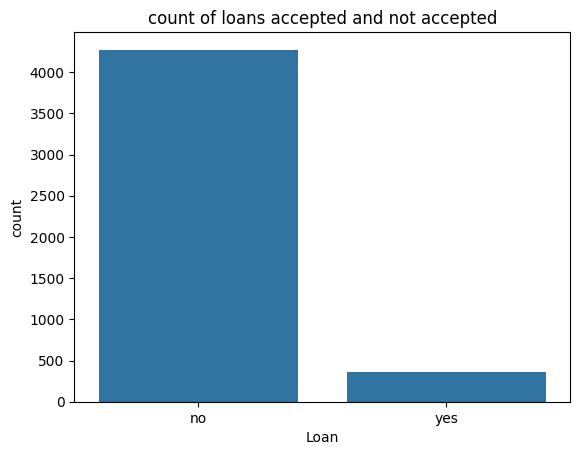

In [32]:
sns.countplot(x='Loan', data=df1)
plt.title("count of loans accepted and not accepted")
plt.show()

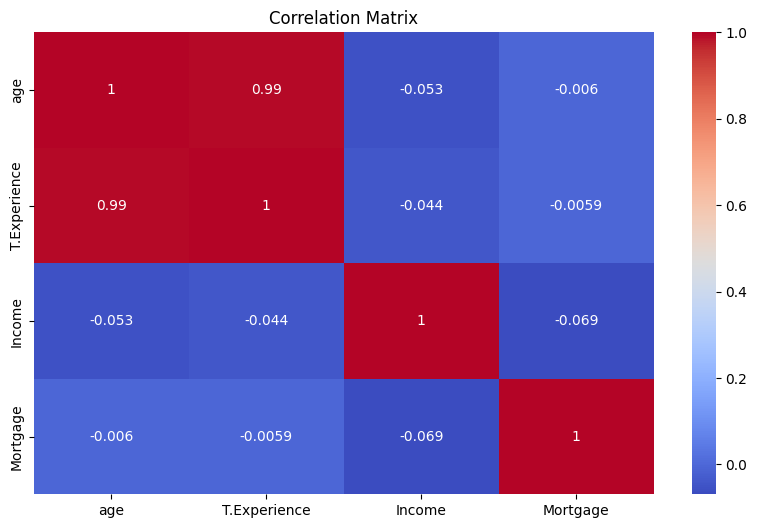

In [59]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

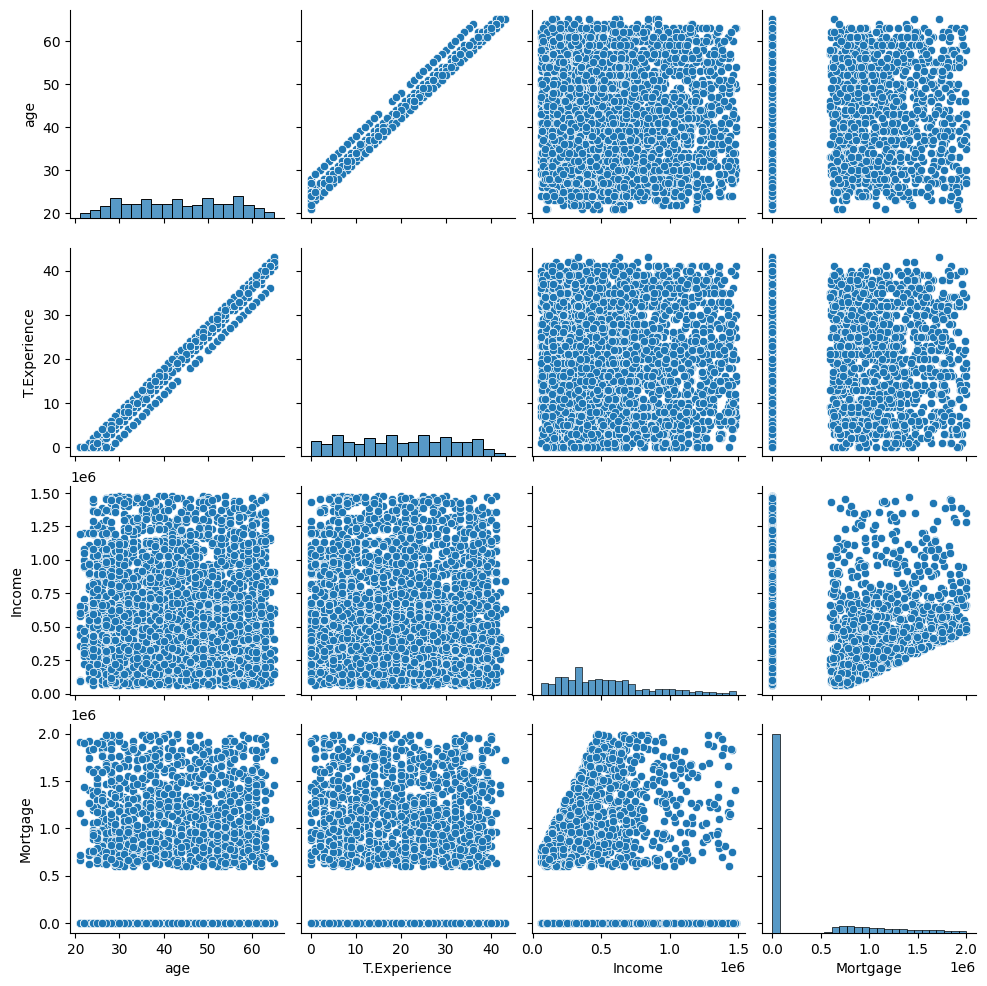

In [34]:
#Pair Plot
sns.pairplot(df1[['age', 'T.Experience', 'Income', 'Mortgage']])
plt.show()

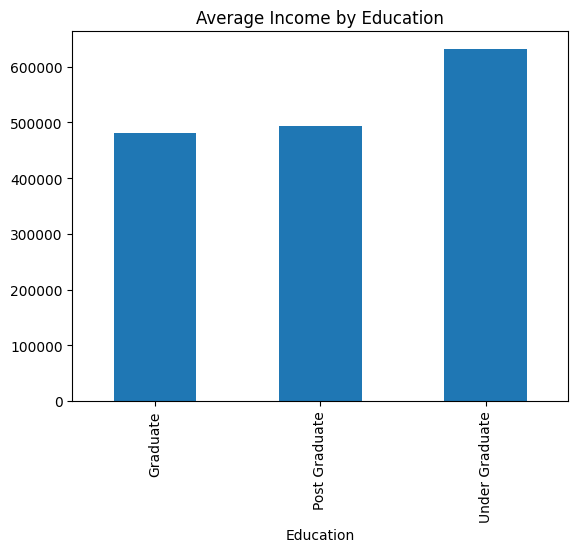

In [35]:
#Group-wise Analysis
df.groupby('Education')['Income'].mean().plot(kind='bar', title='Average Income by Education')
plt.show()

<Axes: xlabel='Pin-code'>

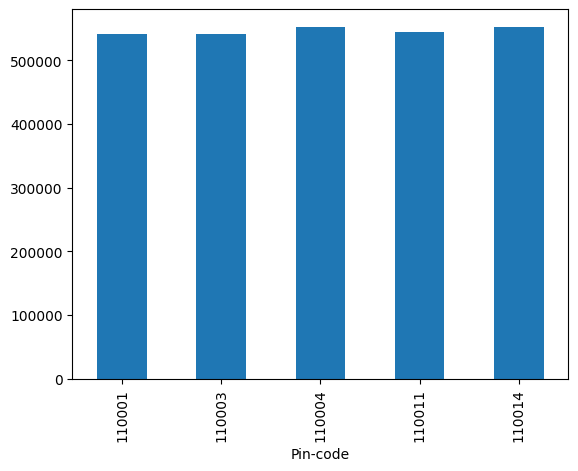

In [36]:
#. Area/Region Analysis
df.groupby('Pin-code')['Income'].mean().plot(kind='bar')

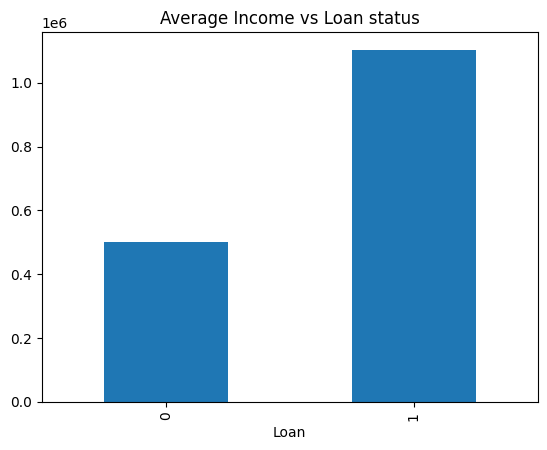

In [47]:
#Group-wise Analysis
df.groupby('Loan')['Income'].mean().plot(kind='bar', title='Average Income vs Loan status')
plt.show()

In [37]:
pd.crosstab( df1['Loan'] ,df1['Fixed Deposit'])	

Fixed Deposit,no,yes
Loan,,
no,4125,147
yes,256,99


In [38]:
pd.crosstab( df1['Net Banking'] ,df1['Education'])

Education,Graduate,Post Graduate,Under Graduate
Net Banking,,,
no,515,601,753
yes,811,811,1136


In [39]:
pd.crosstab( df1['Demat'] ,df1['Education'])

Education,Graduate,Post Graduate,Under Graduate
Demat,,,
no,1183,1275,1685
yes,143,137,204


In [40]:
pd.crosstab( df1['Fixed Deposit'] ,df1['Education'])

Education,Graduate,Post Graduate,Under Graduate
Fixed Deposit,,,
no,1250,1339,1792
yes,76,73,97


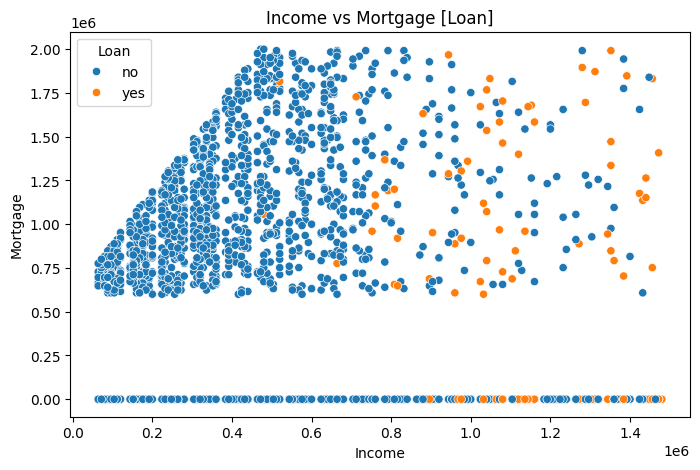

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='Mortgage', hue='Loan', data=df)
plt.title("Income vs Mortgage [Loan]")
plt.show()

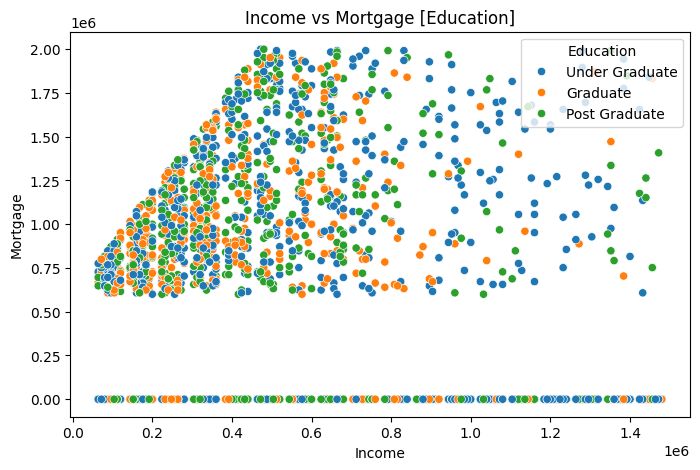

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='Mortgage', hue='Education', data=df)
plt.title("Income vs Mortgage [Education]")
plt.show()

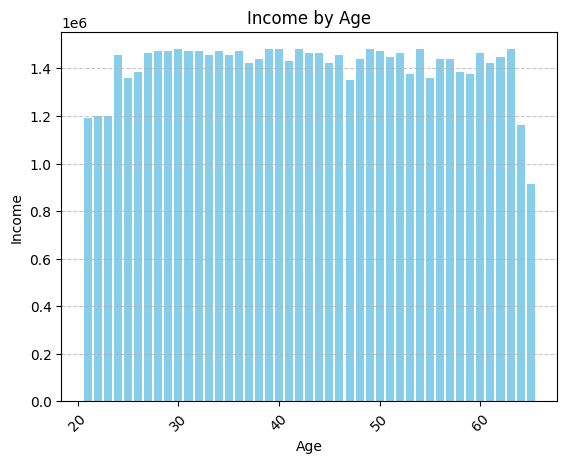

In [43]:
plt.bar(df['age'], df['Income'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income by Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# MACHINE LEARNING MODEL


📊 Evaluation metrics for Random Forest:
Accuracy:  0.9859611231101512
Precision: 0.96875
Recall:    0.8493150684931506
F1 Score:  0.9051094890510949
Confusion Matrix:
 [[851   2]
 [ 11  62]]


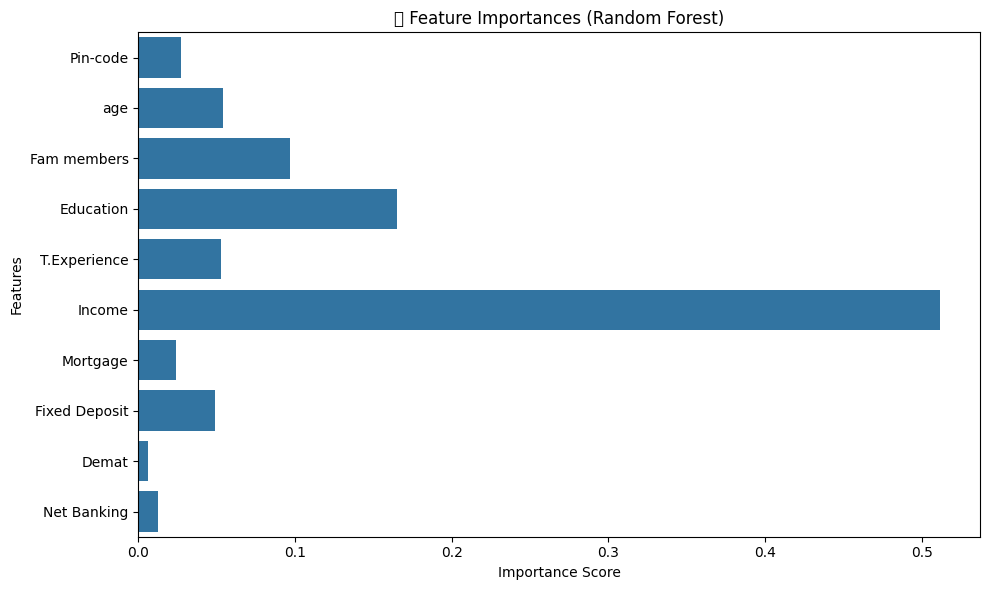


User Descriptions:
__________________
Pin-code: (Enter 6-digit area pincode)
Age:(20 to 60)
Fam Member:(One or More member)
Education:1[Post Graduate], 2[Graduate], 3[Under Graduate]
T.Experience:(0 to 50)
Income:(Minimum 30000)
Mortage:(Enter mortage amount number)
Fixed Deposite: 0[No],1[Yes]
Demat: 0[No],1[Yes]
Net Banking: 0[No],1[Yes]
__________________


Pin-code:  110001
Age:  23
Family Members:  1
Education:  2
T.Experience:  2
Income:  5600000
Mortage:  0
Fixed Deposit:  1
Demat:  1
Net Banking:  1



Random Forest Prediction:
❌ LOAN NOT ACCEPTED


In [44]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

#------>  Data collection  <-------
df = pd.read_csv('dashboard_dataset.csv')

#------>  Data preprocessing (encoding) <-------
# Separate encoders for each categorical column
le_education = LabelEncoder()
le_fd = LabelEncoder()
le_demat = LabelEncoder()
le_netbank = LabelEncoder()
le_loan = LabelEncoder()

df['Education'] = le_education.fit_transform(df['Education'])
df['Fixed Deposit'] = le_fd.fit_transform(df['Fixed Deposit'])
df['Demat'] = le_demat.fit_transform(df['Demat'])
df['Net Banking'] = le_netbank.fit_transform(df['Net Banking'])
df['Loan'] = le_loan.fit_transform(df['Loan'])

# Features and target (now includes Pincode)
X = df[['Pin-code' ,'age','Fam members','Education','T.Experience','Income','Mortgage',
        'Fixed Deposit','Demat','Net Banking', ]]
y = df['Loan']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Evaluation metrics for {model_name}:")
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:   ", recall_score(y_true, y_pred))
    print("F1 Score: ", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Print evaluations
evaluate_model(y_test, rf_pred, "Random Forest")

#-----> Feature Importance Plot <-----
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title(' Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#-----> User Input <-----
print("\nUser Descriptions:")
print("__________________")
print("Pin-code: (Enter 6-digit area pincode)")
print("Age:(20 to 60)")
print("Fam Member:(One or More member)")
print("Education:1[Post Graduate], 2[Graduate], 3[Under Graduate]")
print("T.Experience:(0 to 50)")
print("Income:(Minimum 30000)")
print("Mortage:(Enter mortage amount number)")
print("Fixed Deposite: 0[No],1[Yes]")
print("Demat: 0[No],1[Yes]")
print("Net Banking: 0[No],1[Yes]")

print("__________________")
pincode = int(input("Pin-code: "))
age = int(input("Age: "))
f_member = float(input("Family Members: "))
edu = int(input("Education: "))
T_exp = float(input("T.Experience: "))
inc = int(input("Income: "))
mor = int(input("Mortage: "))
dep = int(input("Fixed Deposit: "))
demat = int(input("Demat: "))
bank = int(input("Net Banking: "))

user_input = [[pincode, age, f_member, edu, T_exp, inc, mor, dep, demat, bank]]

# Predict user input
rf_label_encoded = rf.predict(user_input)[0]
rf_label = le_loan.inverse_transform([rf_label_encoded])[0]

print("\nRandom Forest Prediction:")
if rf_label.lower() == 'yes':
    print("✅ LOAN ACCEPTED")
else:
    print("❌ LOAN NOT ACCEPTED")


In [45]:
import joblib

# After training
joblib.dump(le_loan, 'label_encoder.joblib')


['label_encoder.joblib']

In [46]:
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']